# List 3

- ** Exercise 1 **

Use the “default.csv” set date for customers in good and bad payers. 

- default: a factor with levels on and yes indicating when the customer defaulted on their debt
- Student: The factor with Levels on and yes Indicating when the customer is a student
- Balance: The averag Balance That the Customer has remaining on their credit card after making their month
- Incom: Incom of Customer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sbn
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
data1 = pd.read_csv("data/default.csv")
data1

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [3]:
data1.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
data1.tail()

,default,student,balance,income
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365
9999,No,Yes,200.922183,16862.952321


In [5]:
data1.shape

(10000, 4)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [7]:
data1.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

# Data Analysis

In [8]:
# Checking null data
data1.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [9]:
# Target Column Dataset
data1.default.value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

<Axes: xlabel='default', ylabel='count'>

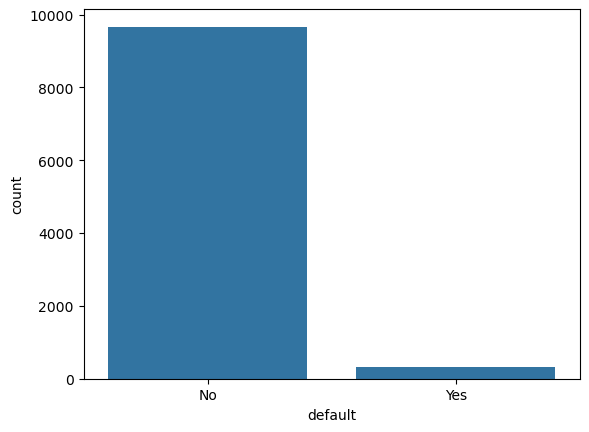

In [10]:
sns.countplot(x="default", data=data1)

<Axes: xlabel='student', ylabel='count'>

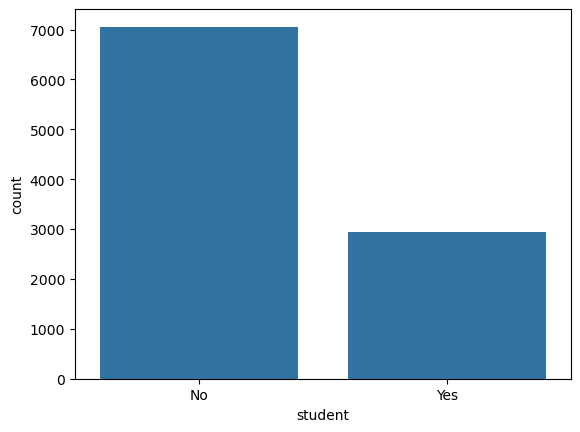

In [11]:
sns.countplot(x="student", data=data1)

<Axes: ylabel='income'>

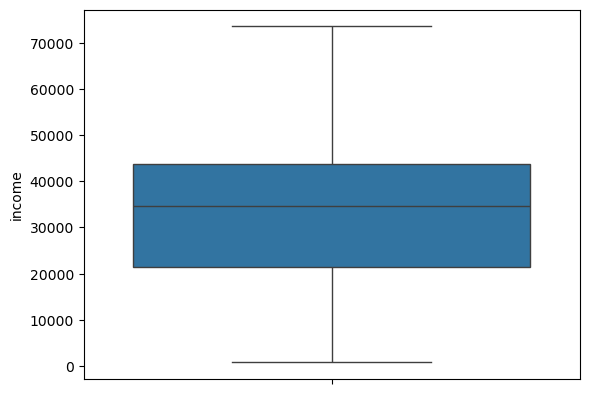

In [12]:
sns.boxplot(data=data1["income"])

<Axes: xlabel='student', ylabel='income'>

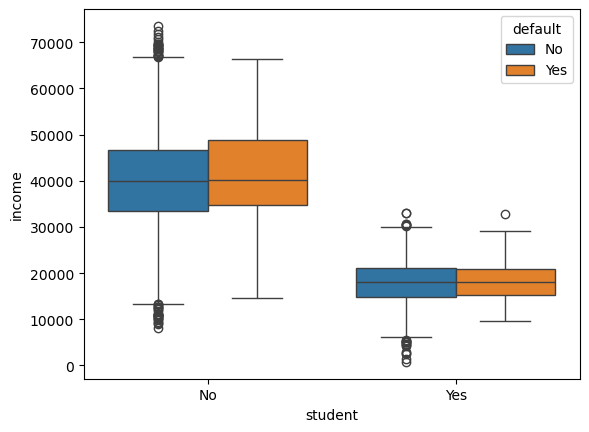

In [13]:
sns.boxplot(x="student", y="income", hue="default", data=data1)

# Feature Engineering

In [14]:
data1['default'] = data1['default'].map({'Yes': 1, 'No': 0})
data1['student'] = data1['student'].map({'Yes': 1, 'No': 0})
data1.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


# Division Training and Test

In [15]:
# Define the features and the target
x1 = data1[['student', 'balance', 'income']]
y1 = data1['default']

In [16]:
# Viewing x
print(x1.shape)

(10000, 3)


In [17]:
# Viewing y
print(y1.shape)

(10000,)


# Training and test

In [18]:
# Model Training and Test
from sklearn.model_selection import train_test_split

# Divide the data
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [19]:
print(f'Tamanho do treino: {X_train.shape}')
print(f'Tamanho do teste: {X_test.shape}')

Tamanho do treino: (7000, 3)
Tamanho do teste: (3000, 3)


# Model ML Regression

In [20]:
# Logistics Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_linear_logistic = LogisticRegression()
model_linear_logistic_fit = model_linear_logistic.fit(X_train, y_train)
model_linear_logistic

LogisticRegression()

In [21]:
# Score Model
model_linear_logistic_score = model_linear_logistic.score(X_train,y_train)
print("Score modelo Regressão lositica", model_linear_logistic_score)

Score modelo Regressão lositica 0.9734285714285714


In [22]:
# Model forecast
model_linear_logistic_pred = model_linear_logistic.predict(X_test)

Matriz de Confusão:


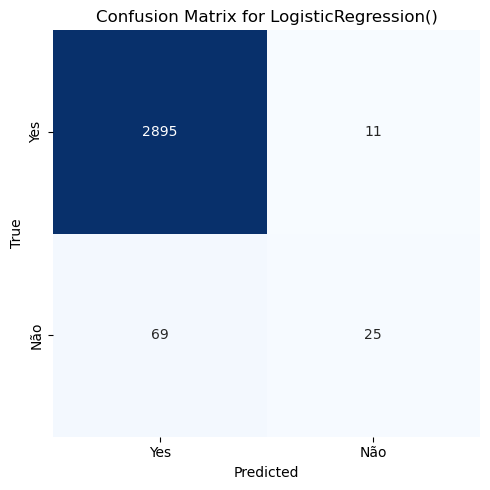

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_linear_logistic_pred)
print('Matriz de Confusão:')

#
class_labels = ["Yes", "Não"]

# Plot the confusion matrix with labels
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix for {model_linear_logistic}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score

# Avaliar o modelo
accuracy = accuracy_score(y_test, model_linear_logistic_pred)

# Curva ROC
y_proba = model_linear_logistic.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba) # Calcular a Curva ROC
auc = roc_auc_score(y_test, y_proba) # Calcular a AUC-ROC

print(f'AUC-ROC: {auc:.2f}')
print(f'Acurácia: {accuracy:.2f}')

AUC-ROC: 0.95
Acurácia: 0.97


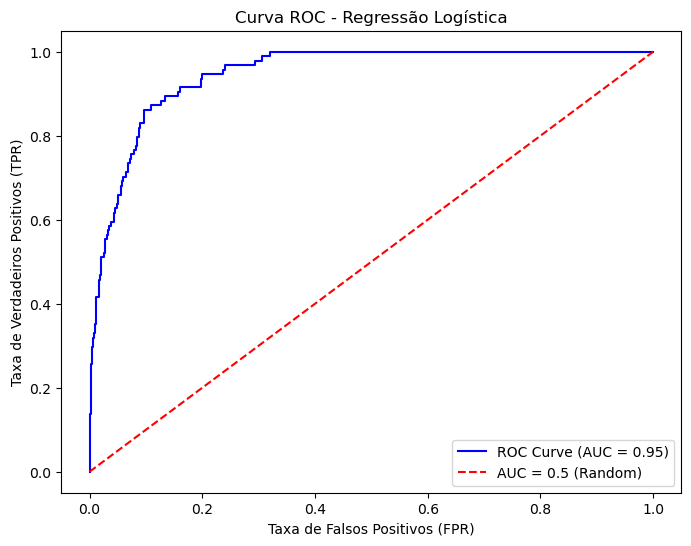

In [25]:
plt.figure(figsize=(8, 6)) # Plotar a Curva ROC
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='AUC = 0.5 (Random)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_test, model_linear_logistic_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2906
           1       0.69      0.27      0.38        94

    accuracy                           0.97      3000
   macro avg       0.84      0.63      0.69      3000
weighted avg       0.97      0.97      0.97      3000



- **Exercício 2**
  
Utilize a data set “carro.csv” para classificar os carros  com maior consumo (consumo = 1 x consumo = 0)
Cylinders: Number of cylinders between 4 and 8 Displacement: Engine displacement (cu. inches)

- Horsepower: Engine horsepower
- Weight: Vehicle weight (lbs.)
- Acceleration: Time to accelerate from 0 to 60 mph (sec.)
- Year: Model year (modulo 100)
- Origin: Origin of car (1. American, 2. European, 3. Japanese)
- Name: Vehicle name
- Consumo: (1. Alto consumo, 2. Baixo Consumo)

- **Modelos classificação: Modelos Regressão logistica, árvore decisão**

In [27]:
base2 = pd.read_csv("data/carro.csv")
base2

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,consumo
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,4,120.0,79,2625,18.6,82,1,ford ranger,1


In [28]:
base2.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,consumo
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,8,302.0,140,3449,10.5,70,1,ford torino,0


In [29]:
base2.tail()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,consumo
387,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,4,120.0,79,2625,18.6,82,1,ford ranger,1
391,4,119.0,82,2720,19.4,82,1,chevy s-10,1


In [30]:
base2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    int64  
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   year          392 non-null    int64  
 6   origin        392 non-null    int64  
 7   name          392 non-null    object 
 8   consumo       392 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 27.7+ KB


In [31]:
base2.dtypes

cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
consumo           int64
dtype: object

# Análise dados

In [32]:
base2.consumo.value_counts()

consumo
0    211
1    181
Name: count, dtype: int64

In [33]:
# Verificando dados nulos
base2.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
consumo         0
dtype: int64

<Axes: xlabel='consumo', ylabel='year'>

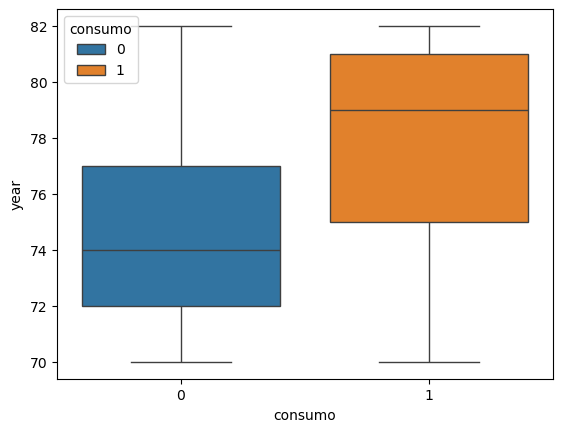

In [34]:
sns.boxplot(x="consumo", y="year", hue="consumo", data=base2) 

<Axes: xlabel='consumo', ylabel='cylinders'>

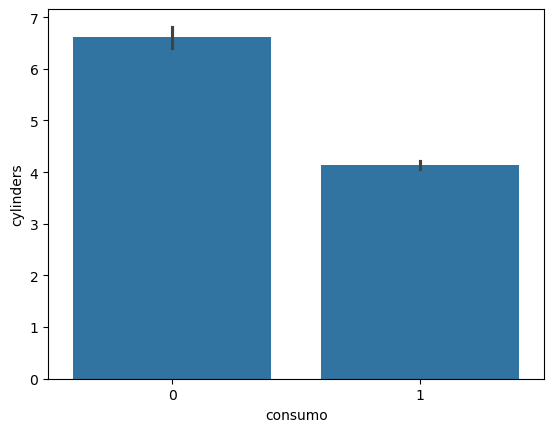

In [35]:
sns.barplot(x="consumo", y="cylinders", data=base2)

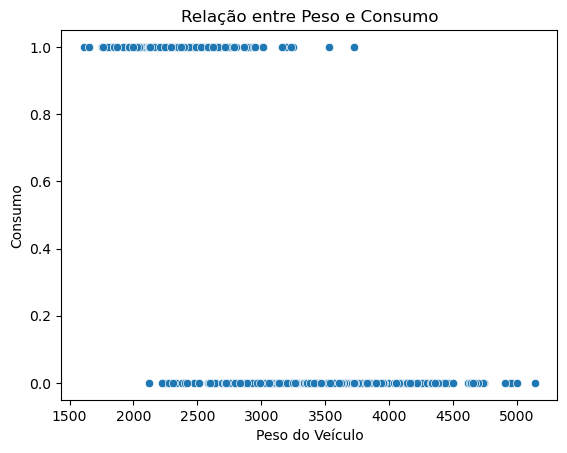

In [36]:
sns.scatterplot(data=base2, x='weight', y='consumo')
plt.title('Relação entre Peso e Consumo')
plt.xlabel('Peso do Veículo')
plt.ylabel('Consumo')
plt.show()

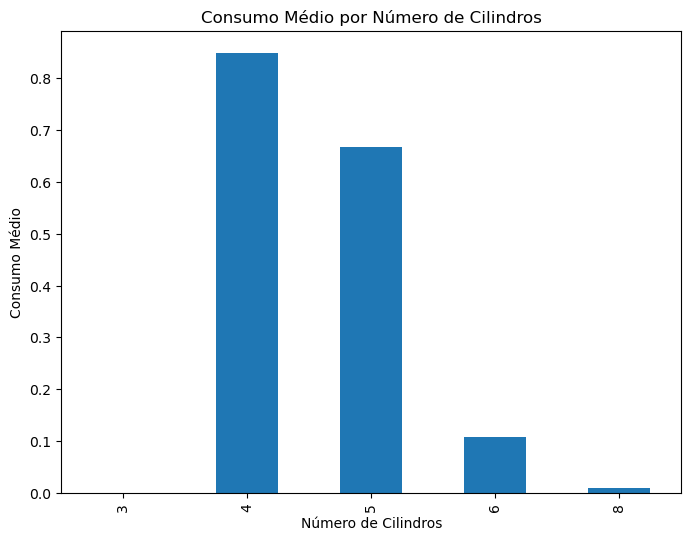

In [37]:
# Consumo médio por número de cilindros
consumo_por_cilindros = base2.groupby('cylinders')['consumo'].mean()

# Visualizar
consumo_por_cilindros.plot(kind='bar', figsize=(8, 6))
plt.title('Consumo Médio por Número de Cilindros')
plt.xlabel('Número de Cilindros')
plt.ylabel('Consumo Médio')
plt.show()

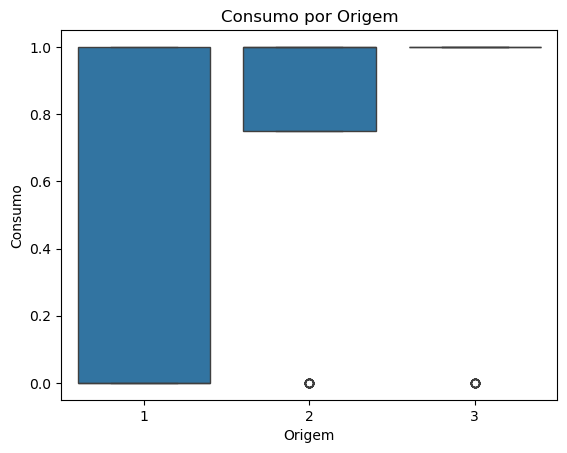

In [38]:
# Boxplot por origem
sns.boxplot(data=base2, x='origin', y='consumo')
plt.title('Consumo por Origem')
plt.xlabel('Origem')
plt.ylabel('Consumo')
plt.show()

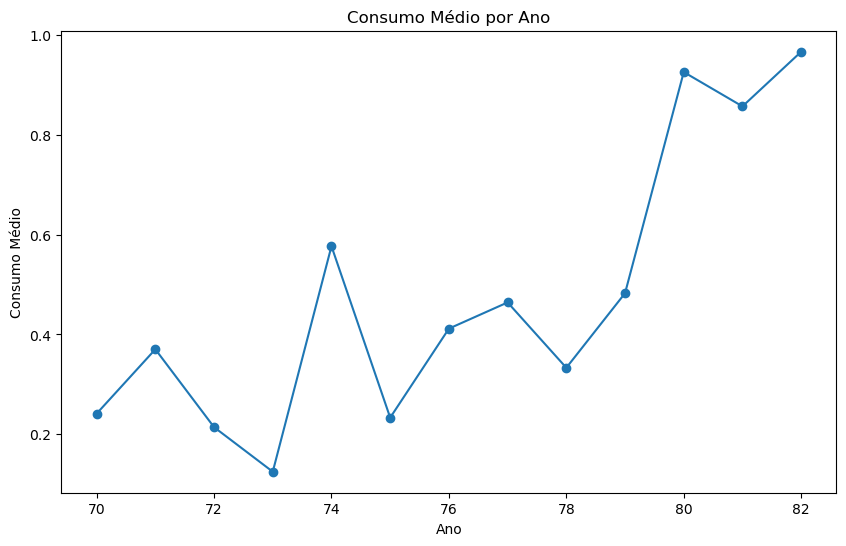

In [39]:
# Consumo médio por ano
consumo_por_ano = base2.groupby('year')['consumo'].mean()

# Visualizar
consumo_por_ano.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Consumo Médio por Ano')
plt.xlabel('Ano')
plt.ylabel('Consumo Médio')
plt.show()

In [40]:
## Insights adicionais
# Identificar os carros com maior e menor consumo

# Veículo com maior consumo
print("Carro com maior consumo:")
print(base2.loc[base2['consumo'].idxmax()])

Carro com maior consumo:
cylinders                           4
displacement                    113.0
horsepower                         95
weight                           2372
acceleration                     15.0
year                               70
origin                              3
name            toyota corona mark ii
consumo                             1
Name: 14, dtype: object


In [41]:
# Veículo com menor consumo
print("Carro com menor consumo:")
print(base2.loc[base2['consumo'].idxmin()])

Carro com menor consumo:
cylinders                               8
displacement                        307.0
horsepower                            130
weight                               3504
acceleration                         12.0
year                                   70
origin                                  1
name            chevrolet chevelle malibu
consumo                                 0
Name: 0, dtype: object


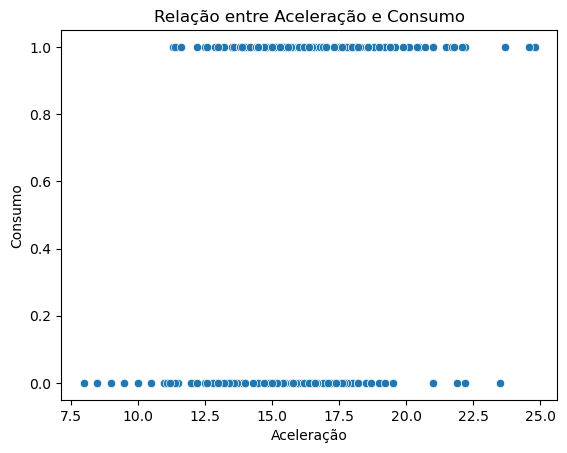

In [42]:
sns.scatterplot(data=base2, x='acceleration', y='consumo')
plt.title('Relação entre Aceleração e Consumo')
plt.xlabel('Aceleração')
plt.ylabel('Consumo')
plt.show()

In [43]:
# Verificando dados nulos
print(base2.isnull().sum())

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
consumo         0
dtype: int64


# Divisão treino e teste

In [44]:
# Definir as features e o target
x1 = base2[['cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'year', 'origin']]
y1 = base2['consumo']

In [45]:
# Visualizando linhas e colunas x1
print(x1.shape)

(392, 7)


In [46]:
# Visualizando linhas e colunas x2
print(y1.shape)

(392,)


In [47]:
# Treino e teste modelo
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [48]:
# Visualizando dados treino e teste
print("Linhas colunas x train", X_train.shape)
print("Linhas colunas y train", y_train.shape)
print()
print("Linhas colunas y test", X_test.shape)
print("Linhas colunas y test", y_test.shape)

Linhas colunas x train (274, 7)
Linhas colunas y train (274,)

Linhas colunas y test (118, 7)
Linhas colunas y test (118,)


In [49]:
# Modelo regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_linear_logistic = LogisticRegression()
model_linear_logistic_fit = model_linear_logistic.fit(X_train, y_train)
model_linear_logistic

C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# Score modelo
model_linear_logistic_score = model_linear_logistic.score(X_train,y_train)
print("Score modelo Regressão lositica", model_linear_logistic_score)

Score modelo Regressão lositica 0.8905109489051095


In [51]:
# Previsão modelo
model_linear_logistic_pred2 = model_linear_logistic.predict(X_test)

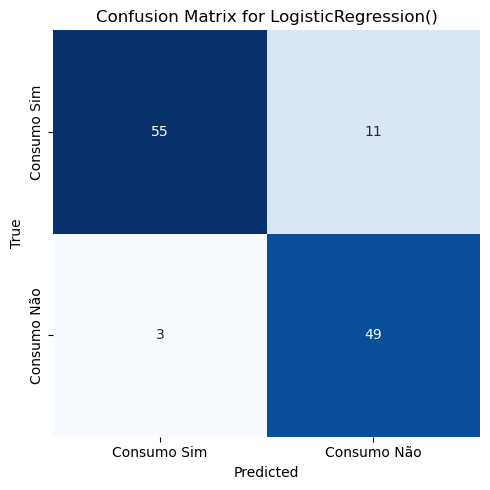

In [52]:
# Matriz confusão
cm2 = confusion_matrix(y_test, model_linear_logistic_pred2)

# labels
class_labels = ["Consumo Sim", "Consumo Não"]

# Plot the confusion matrix with labels
plt.figure(figsize=(5, 5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title(f"Confusion Matrix for {model_linear_logistic}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Avaliar o modelo
accuracy = accuracy_score(y_test, model_linear_logistic_pred2)

# AUC ROC
y_proba = model_linear_logistic.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba) # Calcular a Curva ROC
auc = roc_auc_score(y_test, y_proba) # Calcular a AUC-ROC

print(f'AUC-ROC: {auc:.2f}')
print(f'Acurácia: {accuracy:.2f}')

AUC-ROC: 0.97
Acurácia: 0.88


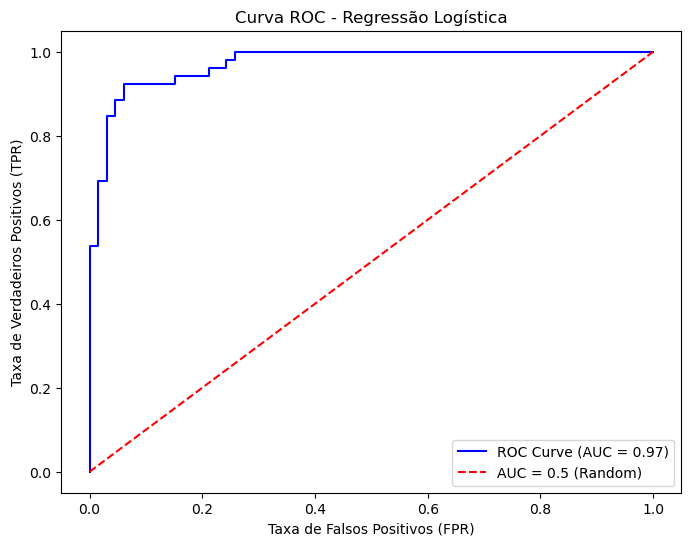

In [54]:
plt.figure(figsize=(8, 6)) # Plotar a Curva ROC
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='AUC = 0.5 (Random)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

In [55]:
# classification_report modelo regressão logistica
report = classification_report(y_test, model_linear_logistic_pred2)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        66
           1       0.82      0.94      0.88        52

    accuracy                           0.88       118
   macro avg       0.88      0.89      0.88       118
weighted avg       0.89      0.88      0.88       118



**Exercício 3**

Utilize a data set “base fibrose” para modelar o conjunto “F0F1” x “F2F3F4”, onde Fi é o grau da doença Hepática Fibrose.

In [56]:
df1 = pd.read_csv("data/basefibrose.csv", encoding="ISO-8859-1", sep=";")
df1

,ID,Sexo,Etnia,Idade,IMC,Circuferenciaa_Abdominal,GRAU_FIBROSE,Fibroscan,Fibroscan.IQR
0,1,Masculino,caucasiana,63,"22,2",98,F1,"6,3",10
1,2,Masculino,caucasiana,59,"26,7",101,F2,"7,7",13
2,3,Masculino,afrodescendente,45,"25,2",92,F0,"4,8",25
3,4,Masculino,caucasiana,30,"18,5",72,F2,"9,5",13
4,5,Feminino,caucasiana,56,"21,2",90,F1,"6,4",30
...,...,...,...,...,...,...,...,...,...
102,103,Feminino,afrodescendente,36,"21,4",82,F3,"5,7",25
103,104,Masculino,afrodescendente,68,"24,4",92,F1,"3,4",18
104,105,Masculino,caucasiana,58,"27,3",100,F3,"6,4",6
105,106,Masculino,afrodescendente,54,"28,5",104,F3,"9,6",21


In [57]:
df1.head()

,ID,Sexo,Etnia,Idade,IMC,Circuferenciaa_Abdominal,GRAU_FIBROSE,Fibroscan,Fibroscan.IQR
0,1,Masculino,caucasiana,63,"22,2",98,F1,"6,3",10
1,2,Masculino,caucasiana,59,"26,7",101,F2,"7,7",13
2,3,Masculino,afrodescendente,45,"25,2",92,F0,"4,8",25
3,4,Masculino,caucasiana,30,"18,5",72,F2,"9,5",13
4,5,Feminino,caucasiana,56,"21,2",90,F1,"6,4",30


In [58]:
df1.tail()

,ID,Sexo,Etnia,Idade,IMC,Circuferenciaa_Abdominal,GRAU_FIBROSE,Fibroscan,Fibroscan.IQR
102,103,Feminino,afrodescendente,36,"21,4",82,F3,"5,7",25
103,104,Masculino,afrodescendente,68,"24,4",92,F1,"3,4",18
104,105,Masculino,caucasiana,58,"27,3",100,F3,"6,4",6
105,106,Masculino,afrodescendente,54,"28,5",104,F3,"9,6",21
106,107,Feminino,caucasiana,40,"27,7",95,F1,6,10


In [59]:
df1.shape

(107, 9)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        107 non-null    int64 
 1   Sexo                      107 non-null    object
 2   Etnia                     107 non-null    object
 3   Idade                     107 non-null    int64 
 4   IMC                       107 non-null    object
 5   Circuferenciaa_Abdominal  107 non-null    int64 
 6   GRAU_FIBROSE              107 non-null    object
 7   Fibroscan                 107 non-null    object
 8   Fibroscan.IQR             107 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 7.7+ KB


In [61]:
df1.dtypes

ID                           int64
Sexo                        object
Etnia                       object
Idade                        int64
IMC                         object
Circuferenciaa_Abdominal     int64
GRAU_FIBROSE                object
Fibroscan                   object
Fibroscan.IQR                int64
dtype: object

# Análise de dados

In [62]:
df1.isnull().sum()

ID                          0
Sexo                        0
Etnia                       0
Idade                       0
IMC                         0
Circuferenciaa_Abdominal    0
GRAU_FIBROSE                0
Fibroscan                   0
Fibroscan.IQR               0
dtype: int64

In [63]:
df1.Etnia.value_counts()

Etnia
caucasiana         72
afrodescendente    34
asiática            1
Name: count, dtype: int64

<Axes: xlabel='Sexo', ylabel='count'>

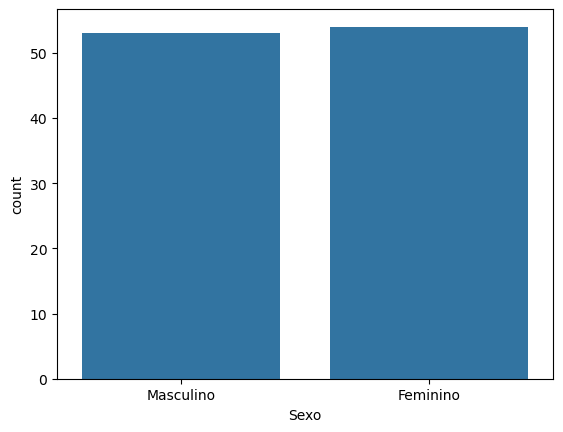

In [64]:
sns.countplot(x="Sexo", data=df1)

<Axes: xlabel='Etnia', ylabel='count'>

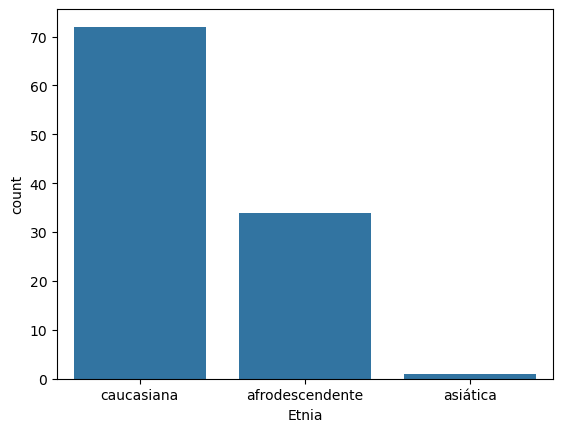

In [65]:
sns.countplot(x="Etnia", data=df1)

C:\Users\rafae\AppData\Local\Temp\ipykernel_14508\1549383807.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Idade", y="Etnia", ci=None, data=df1)


<Axes: xlabel='Idade', ylabel='Etnia'>

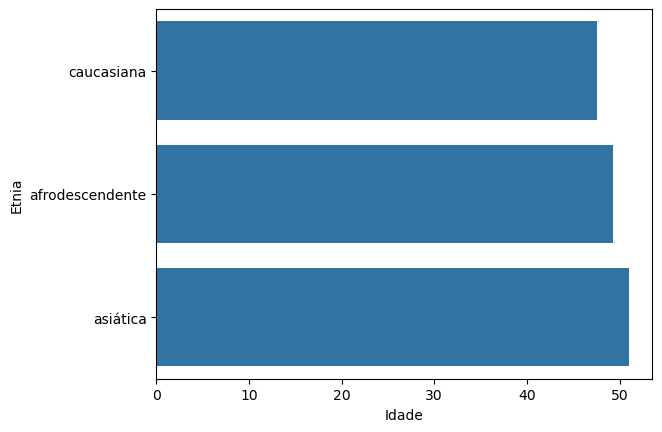

In [66]:
sns.barplot(x="Idade", y="Etnia", ci=None, data=df1) 

<Axes: xlabel='GRAU_FIBROSE', ylabel='count'>

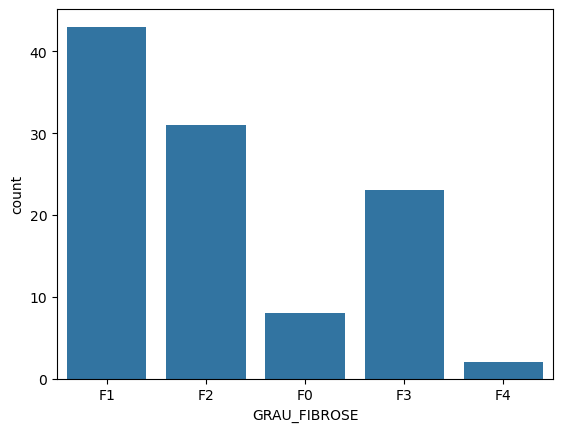

In [67]:
sns.countplot(x="GRAU_FIBROSE", data=df1)

C:\Users\rafae\AppData\Local\Temp\ipykernel_14508\325955521.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Idade", y="GRAU_FIBROSE", ci=None, data=df1)


<Axes: xlabel='Idade', ylabel='GRAU_FIBROSE'>

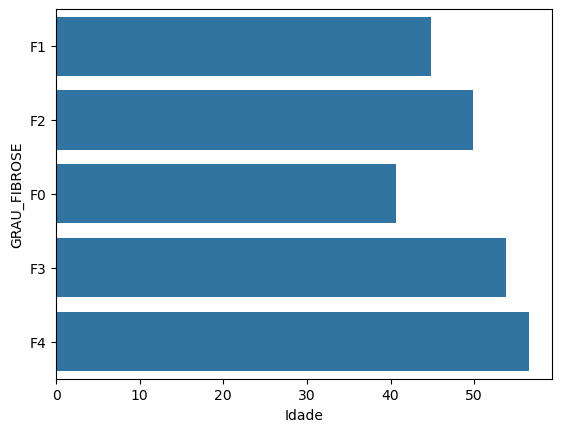

In [68]:
sns.barplot(x="Idade", y="GRAU_FIBROSE", ci=None, data=df1) 

# Pré-processamento

In [69]:
# Substituir vírgulas por pontos e converter a coluna para numérica
df1["Fibroscan"] = df1["Fibroscan"].str.replace(",", ".").astype(float)
df1["IMC"] = df1["IMC"].str.replace(",", ".").astype(float)

# Converter a coluna para inteiro
df1["Fibroscan"] = df1["Fibroscan"].astype(int)
df1["IMC"] = df1["IMC"].astype(int)

# Verifique novamente os dados
df1.dtypes

ID                           int64
Sexo                        object
Etnia                       object
Idade                        int64
IMC                          int32
Circuferenciaa_Abdominal     int64
GRAU_FIBROSE                object
Fibroscan                    int32
Fibroscan.IQR                int64
dtype: object

# Feature Engineering

In [70]:
# Transformando varaivel Etnia categorica em númerica
df1['Etnia'] = df1['Etnia'].map({'caucasiana': 0, 
                               'afrodescendente': 1, 
                               "asiática": 2})

# Transformando variavel sexo
df1['Sexo'] = df1['Sexo'].map({'Feminino': 0, 
                             'Masculino': 1})

# Transformando varaivel GRAU_FIBROSE categorica em númerica
df1["GRAU_FIBROSE"] = df1["GRAU_FIBROSE"].map({"F1":0, 
                                             "F2":1, 
                                             "F3":1, 
                                             "F0":0, 
                                             "F4":1})

# visualizando
df1.GRAU_FIBROSE.value_counts()

GRAU_FIBROSE
1    56
0    51
Name: count, dtype: int64

In [71]:
df1.GRAU_FIBROSE.value_counts()

GRAU_FIBROSE
1    56
0    51
Name: count, dtype: int64

# Divisão treino e teste

In [72]:
# Definir as features e o target
x1 = df1[['Sexo', 'Idade', 'IMC','Circuferenciaa_Abdominal', 'GRAU_FIBROSE', 'Fibroscan', 'Fibroscan.IQR']]
y1 = df1['Etnia']

# Treino e teste modelo
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

print(f'Tamanho do treino: {X_train.shape}')
print(f'Tamanho do teste: {X_test.shape}')

Tamanho do treino: (74, 7)
Tamanho do teste: (33, 7)


# Modelo ML

In [73]:
# Modelo regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_linear_logistic4 = LogisticRegression()
model_linear_logistic_fit = model_linear_logistic4.fit(X_train, y_train)
model_linear_logistic4

C:\Users\rafae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
# Previsão modelo
model_linear_logistic_pred4 = model_linear_logistic4.predict(X_test)

# Score modelo
model_linear_logistic_score = model_linear_logistic4.score(X_train,y_train)
print("Score modelo Regressão lositica", model_linear_logistic_score)

Score modelo Regressão lositica 0.7702702702702703


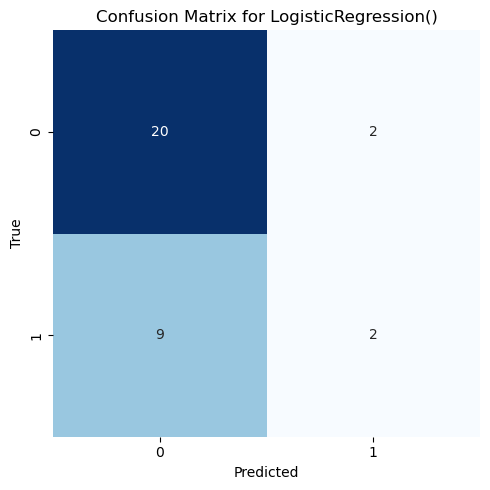

In [75]:
# Matriz de Confusão
cm3 = confusion_matrix(y_test, model_linear_logistic_pred4)

# Plot the confusion matrix with labels
plt.figure(figsize=(5, 5))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix for {model_linear_logistic}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [76]:
# AUC ROC
y_proba = model_linear_logistic4.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba) # Calcular a Curva ROC
auc = roc_auc_score(y_test, y_proba) # Calcular a AUC-ROC

# Avaliar o modelo
accuracy = accuracy_score(y_test, model_linear_logistic_pred4)

print(f'Acurácia: {accuracy:.2f}')
print(f'AUC-ROC: {auc:.2f}')

Acurácia: 0.67
AUC-ROC: 0.59


In [77]:
# classification_report modelo regressão logistica
report = classification_report(y_test, model_linear_logistic_pred4)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        22
           1       0.50      0.18      0.27        11

    accuracy                           0.67        33
   macro avg       0.59      0.55      0.53        33
weighted avg       0.63      0.67      0.61        33



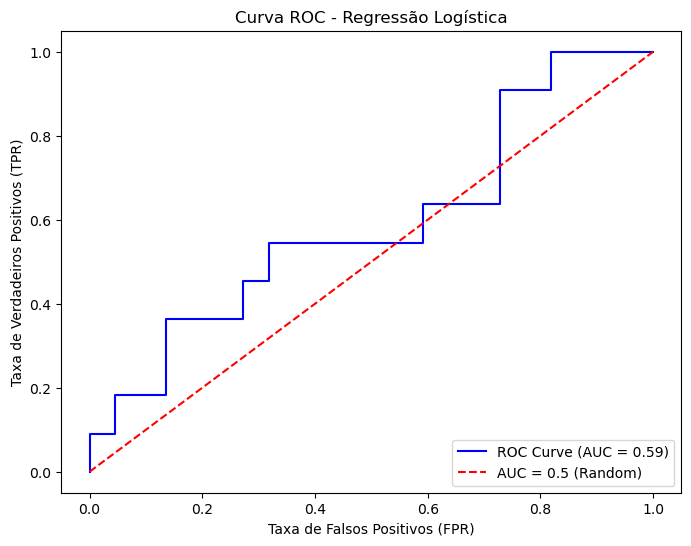

In [78]:
plt.figure(figsize=(8, 6)) # Plotar a Curva ROC
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='AUC = 0.5 (Random)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()